Python 作为机器学习的常用工具，有许多 Python 库已经封装好了机器学习常用的各种算法。这些库通常经过了很多优化，其运行效率比上面我们自己实现的要高。所以，能够熟练掌握各种机器学习库的用法，也是机器学习的学习目标之一。其中，scikit-learn（简称 sklearn）是一个常用的机器学习算法库，包含了数据处理工具和许多简单的机器学习算法。本节以 sklearn 库为例，来讲解如何使用封装好的 KNN 算法，并在高斯数据集 gauss.csv 上观察分类效果。该数据集包含一些平面上的点，分别由两个独立的二维高斯分布随机生成，每一行包含三个数，依次是点的和坐标和类别。首先，我们导入数据集并进行可视化。

数据集大小： 200


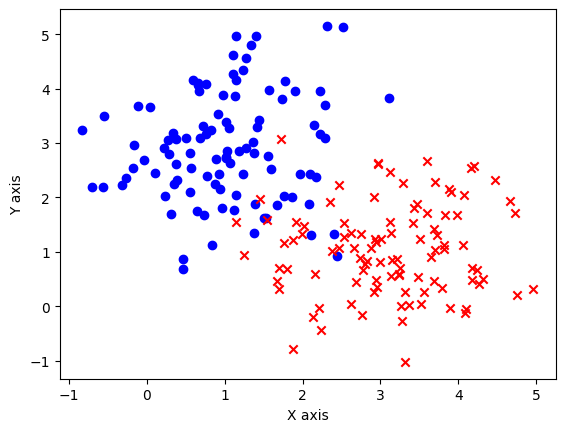

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier # sklearn中的KNN分类器
from matplotlib.colors import ListedColormap

# 读入高斯数据集
data = np.loadtxt('gauss.csv', delimiter=',')
x_train = data[:, :2]
y_train = data[:, 2]
print('数据集大小：', len(x_train))

# 可视化
plt.figure()
plt.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
plt.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

在高斯数据集中，我们将整个数据集作为训练集，将平面上的其他点作为测试集，观察 KNN 在不同的值下的分类效果。因此，我们不对数据集进行划分，而是在平面上以 0.02 为间距构造网格作为测试集。由于平面上的点是连续的，我们无法依次对它们测试，只能像这样从中采样。在没有特殊要求的情况下，我们一般采用最简单的均匀网格采样。这里，我们选用网格间距 0.02 是为了平衡测试点的个数和测试点的代表性，读者也可以调整该数值观察结果的变化。



##### 下面先介绍一下3个要用到的Numpy函数  
**arange函数** 
Numpy的arange函数是一个在 NumPy 库中非常常用的函数，它用于生成在一个指定的区间内均匀间隔的值。  
这个函数类似于 Python 的内置函数 range，但生成的是数组而不是列表，并且可以生成浮点数序列。    
**功能描述**   
numpy.arange 创建一个有序的值序列，开始于给定的 start 值，以指定的 step 增量递增，直到但不包括一个 stop 值。  

**参数**
start：序列的起始值，默认为0。  
stop：序列的终止值（不包括此值）。  
step：两个值之间的间隔，默认为1。  
dtype：数组的数据类型，如果不指定，将会推断生成的数组的数据类型。  
  
**返回值**    
返回一个 ndarray，包含有从 start 到 stop，以 step 为步长的均匀步长值。  


In [ ]:
# 基本用法
arr = np.arange(10)
print(arr)  # 输出: [0 1 2 3 4 5 6 7 8 9]

# 指定起始值和终止值
arr = np.arange(5, 10)
print(arr)  # 输出: [5 6 7 8 9]

# 指定步长
arr = np.arange(0, 10, 2)
print(arr)  # 输出: [0 2 4 6 8]

# 使用浮点数
arr = np.arange(0, 5, 0.5)
print(arr)  # 输出: [0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5]

# 指定dtype
arr = np.arange(2, 3, 0.1, dtype=float)
print(arr)  # 输出: [2.  2.1  2.2  2.3  2.4  2.5  2.6  2.7  2.8  2.9]

**meshgrid函数**  
在 Python 的 NumPy 库中，meshgrid 函数是一个非常有用的工具，主要用于生成坐标矩阵。当你需要对一个二维网格上的每一个点进行操作时，meshgrid 可以帮助你快速生成这些点的坐标。
**功能描述**  
meshgrid 函数接受两个或更多的一维数组，并生成两个或更多的二维网格。这些网格的输出是多个二维矩阵，每个矩阵包含一个坐标轴上的坐标值，用于表示所有由这些一维数组可以组合出的点的网格。这在数据可视化和矩阵运算中尤其有用，例如在创建等高线图或计算二维函数的值。
**参数**  
*xi：一维数组序列，每个数组代表一个维度上的坐标值。
indexing：可选参数，'xy'（默认）或 'ij'。
'xy' 会生成一个网格，其中第一个维度（行）对应于第二个输入数组（y坐标），第二个维度（列）对应于第一个输入数组（x坐标），适用于笛卡尔坐标系统。
'ij' 会生成一个网格，其中行坐标与第一个输入数组对应，列坐标与第二个输入数组对应，适用于矩阵索引。
sparse：布尔值，如果为 True，生成的网格是稀疏的，即只创建非重复的数组。

[[50.         49.00010203 48.02061014 ... 48.02061014 49.00010203
  50.        ]
 [49.00010203 48.00020406 47.02071217 ... 47.02071217 48.00020406
  49.00010203]
 [48.02061014 47.02071217 46.04122028 ... 46.04122028 47.02071217
  48.02061014]
 ...
 [48.02061014 47.02071217 46.04122028 ... 46.04122028 47.02071217
  48.02061014]
 [49.00010203 48.00020406 47.02071217 ... 47.02071217 48.00020406
  49.00010203]
 [50.         49.00010203 48.02061014 ... 48.02061014 49.00010203
  50.        ]]


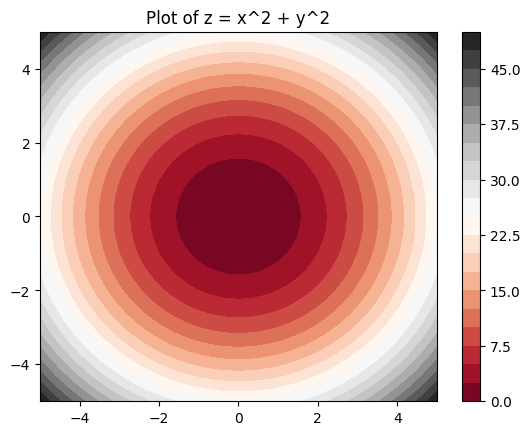

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 x 和 y 的范围
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

# 生成网格
X, Y = np.meshgrid(x, y)

# 计算函数值
Z = X**2 + Y**2

# 使用 Matplotlib 绘制等高线图
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()
plt.title("Plot of z = x^2 + y^2")
plt.show()


**concatenate函数**  
在 Python 的 NumPy 库中，concatenate 函数是用于将两个或多个数组沿指定轴拼接起来的基本工具。这个函数提供了一种在保持数组维度不变的情况下，将多个数组组合成一个更大数组的简便方法。  

**功能描述**  
concatenate 允许你沿一个已存在的轴将一系列 NumPy 数组合并成一个新的数组。这是数据处理和数组操作中常见的需求，特别是在你需要组合来自不同数据源的数据时。  

**参数**  
a1, a2, ...：一个序列，如列表或元组，包含要合并的数组。  
axis：指定拼接的轴的整数。默认是 0，意味着沿第一个轴合并。  
out：可以指定一个用于放置结果的数组。这个数组必须有合适的形状和数据类型来接收合并后的数据。  

In [6]:
# 创建两个数组
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6]])

# 沿着第一个轴（纵向）拼接
c = np.concatenate((a, b), axis=0)
print("Concatenated along axis 0:\n", c)

# 为了沿着第二个轴（横向）拼接，需要确保维度匹配
b = np.array([[5], [6]])
d = np.concatenate((a, b), axis=1)
print("Concatenated along axis 1:\n", d)

Concatenated along axis 0:
 [[1 2]
 [3 4]
 [5 6]]
Concatenated along axis 1:
 [[1 2 5]
 [3 4 6]]


### 下面是真正准备使用KNN，先定义二维矩阵

In [7]:
# 设置步长
step = 0.02
# 设置网格边界
x_min, x_max = np.min(x_train[:, 0]) - 1, np.max(x_train[:, 0]) + 1
y_min, y_max = np.min(x_train[:, 1]) - 1, np.max(x_train[:, 1]) + 1
# 构造网格
xx, yy = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))
grid_data = np.concatenate([xx.reshape(-1, 1), yy.reshape(-1, 1)], axis=1)

在 sklearn 中，KNN 分类器由KNeighborsClassifier定义，通过参数n_neighbors指定的大小。我们分别设置，和观察分类效果。数据集中的点用深色表示，平面上被分到某一类的点用与其相对应的浅色表示。可以看出，随着的增大，分类的边界变得更平滑，但错分的概率也在变大。
这个例子的逻辑实际和前面一个一样，都是针对图上的每一个点，使用KNN算法判断他的类型，然后涂色。重点在搞明白SKLearn的KNN分类器如何使用。

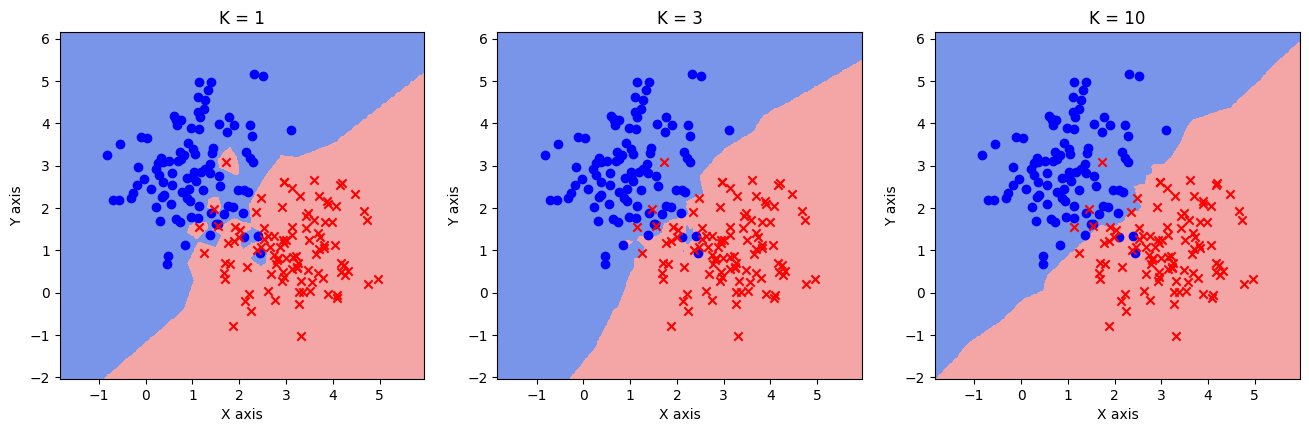

In [8]:
fig = plt.figure(figsize=(16,4.5))
# K值，读者可以自行调整，观察分类结果的变化
ks = [1, 3, 10]
cmap_light = ListedColormap(['royalblue', 'lightcoral'])

for i, k in enumerate(ks):
    # 定义KNN分类器
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)    # 训练模型
    z = knn.predict(grid_data)   # 预测结果

    # 画出分类结果
    ax = fig.add_subplot(1, 3, i + 1)
    ax.pcolormesh(xx, yy, z.reshape(xx.shape), cmap=cmap_light, alpha=0.7)
    ax.scatter(x_train[y_train == 0, 0], x_train[y_train == 0, 1], c='blue', marker='o')
    ax.scatter(x_train[y_train == 1, 0], x_train[y_train == 1, 1], c='red', marker='x')

    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_title(f'K = {k}')
plt.show()
